In [16]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
from numpy.linalg import matrix_power                  # This is to raise matrices to powers
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
from scipy.stats import ks_2samp
from numba import njit, prange
from scipy.signal import find_peaks

In [86]:
def Network_n(n):
    #As = np.random.random(n)*2
    As = np.random.normal(.05, 0.001, n)
    Bs = np.ones(n)
    Bs = np.random.normal(.05, 0.005, n)
    Xs = np.ones(n)
    dXs = np.zeros(n)
    
    Tmax = 1000; ts = 1; dt = 0.1; Saf = np.zeros((int(Tmax/ts)+2,2)); t = 0; click = 0
    while t < Tmax:
        dXs[0] = As[0]/Xs[-1] - Bs[0]*Xs[0] 
        dXs[1:] = As[1:]*Xs[:-1] - Bs[1:]*Xs[1:]
        
        Xs += dXs*dt
        t += dt
        if (t > click*ts):
            Saf[click,0] = t
            Saf[click,1] = Xs[0]
            click += 1
        
    return Saf[:click,:]

TS = np.zeros((10,100))
AS = np.zeros((10,100))
for n in range(10):
    for test in range(100):
        Saf = Network_n(n+3)
    
        t = Saf[:,0]
        x = Saf[:,1]
        peaks, properties = find_peaks(x) # Adjust the prominence value as needed
        yfit = x[peaks]-x[-1]
        tfit = t[peaks]
        a = np.polyfit(tfit,yfit,1)
        TP = t[peaks[1:]]-t[peaks[:-1]]
        TS[n,test] = np.mean(TP[1:])
        AS[n,test] = a[0]
        

    
    

/Users/mheltberg/miniconda3/envs/MathiasEnvironment1/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/mheltberg/miniconda3/envs/MathiasEnvironment1/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/mheltberg/miniconda3/envs/MathiasEnvironment1/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/mheltberg/miniconda3/envs/MathiasEnvironment1/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/mheltberg/miniconda3/envs/MathiasEnvironment1/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3378: RankWarning: Polyfit may be po

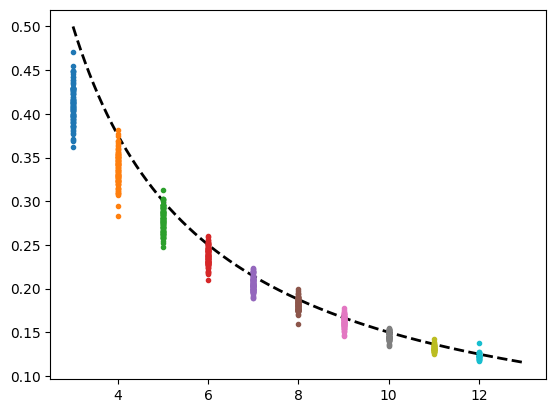

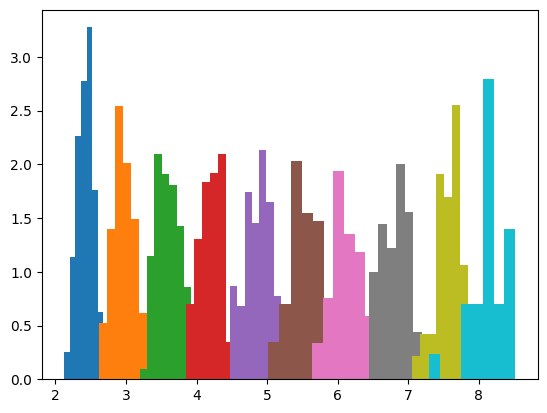

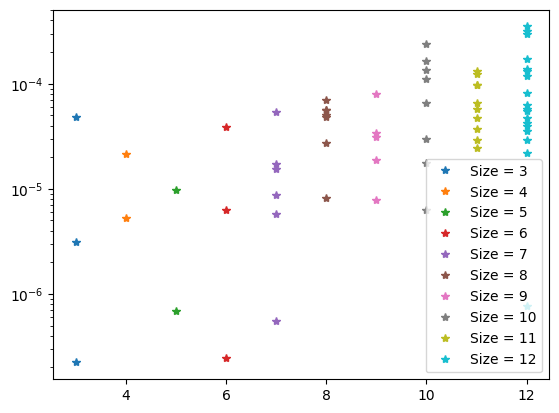

In [90]:
n = np.linspace(0,10,1000)+3
plt.plot(n,0.05*60*1/(2*np.pi)*np.pi/n,'--k',lw=2)
n = np.linspace(0,9,10)+3

for i in range(len(n)):
    ns = np.ones(100)*n[i]
    plt.plot(ns,1/TS[i,:]*60,'.',label='Size = %d'%n[i])
    
    
#plt.legend(loc='lower left')
plt.show()

n = np.linspace(0,9,10)+3
for i in range(len(n)):
    ns = np.ones(100)*n[i]
    plt.hist(TS[i,:]/60,8,density = True,label='Size = %d'%n[i])
    
#plt.legend(loc='lower left')
plt.show()

n = np.linspace(0,9,10)+3
for i in range(len(n)):
    ns = np.ones(100)*n[i]
    plt.semilogy(ns,AS[i,:],'*',label='Size = %d'%n[i])
plt.legend()
plt.show()



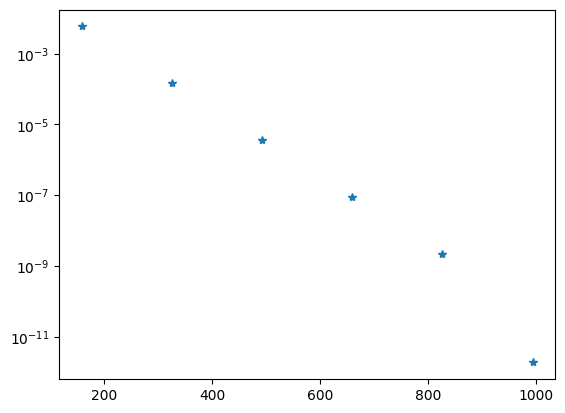

In [88]:

for n in range(1):
    for test in range(1):
        Saf = Network_n(n+3)
    
        t = Saf[:,0]
        x = Saf[:,1]
        peaks, properties = find_peaks(x) # Adjust the prominence value as needed
        yfit = x[peaks]-x[-1]
        tfit = t[peaks]
        a = np.polyfit(tfit,yfit,1)
        plt.semilogy(t[peaks],x[peaks]-x[-1],'*')
       

In [45]:
print( np.random.normal(1, 0., 1000))

[1.01556445 1.06848154 1.18174237 0.94308139 1.16826952 1.0059479
 0.86933581 1.06962263 0.96191945 1.07563974 1.00692807 0.95340712
 0.8212271  1.08421041 1.00324209 1.11903483 1.0094384  1.20731277
 0.89348838 0.95394524 0.92564039 1.04595616 1.05284162 1.05143314
 1.04856738 0.89220758 1.11938829 0.94904633 0.93124545 0.86626454
 0.81027121 0.80491247 0.97337865 0.87373489 1.01749885 0.94153936
 1.03048462 1.10280905 0.9305339  0.99082591 1.09487452 1.20587962
 1.08933002 1.06979551 0.93855944 0.94530575 0.92656907 1.00252161
 0.89484984 1.09190818 0.85913648 0.87634662 1.15903806 1.09355068
 1.14441696 0.9167116  1.07387516 0.94720903 0.86897678 1.02295944
 1.00469271 1.20940496 0.89503124 0.97573617 0.95944747 0.8865187
 1.02362819 1.04170062 0.97886641 0.84181458 0.97510654 1.04534049
 0.99774279 1.0019171  1.02390739 1.02359418 1.12524311 0.88743239
 0.90157033 1.00466367 0.96699514 0.83453499 1.03266813 1.03126935
 0.98537306 1.00454745 0.96461779 0.9722398  1.10902234 0.974487

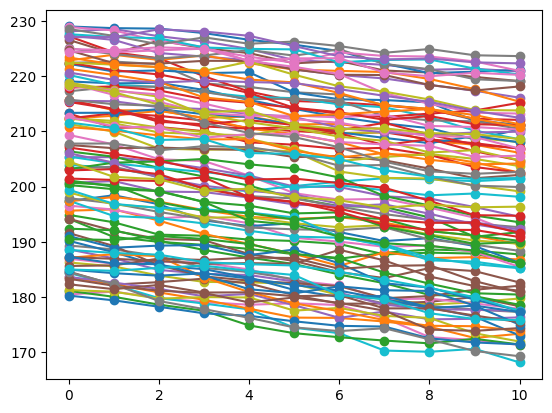

(array([ -0.97497671, 205.48261004]), array([[ 2.93045097e-05, -1.49361149e-04],
       [-1.49361149e-04,  1.05364049e-03]]))
0.005413363989890878


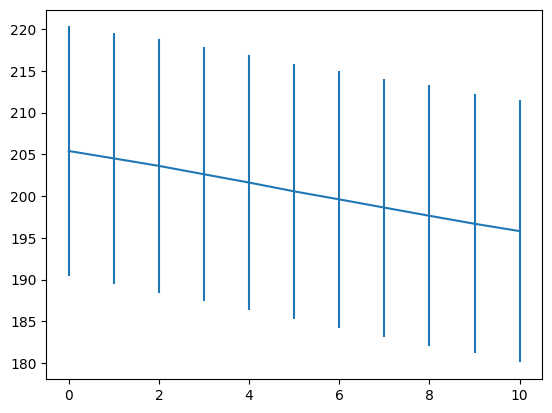

-0.9749384377038804 0.03315867024780853


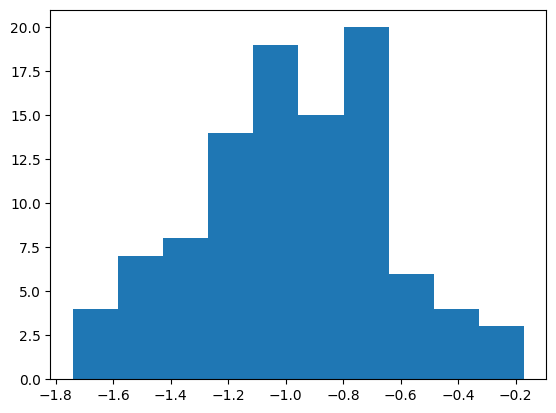

In [120]:
N = 100;

W = np.random.normal(200,10,N)

W = 180 + np.random.random(N)*50


Tmax = 10; t = 0; ts = 1; click = 0; Saf = np.zeros((int(Tmax/ts+1),N)); dt = 0.01;
AS = np.random.normal(-1,0.1,N)
while t < Tmax:
    W += AS*dt + np.random.normal(0,1,N)*np.sqrt(dt)
    
    t += dt
    
    if (t > ts*click):
        Saf[click,:] = W
        click += 1

plt.plot(Saf,'-o')
plt.show()
### Method 1

SS = np.mean(Saf,axis=1)
SSd = np.std(Saf,axis=1)
Time = np.linspace(0,10,11)
plt.errorbar(Time,SS,SSd)
fc = np.polyfit(Time,SS,1,w=SSd,cov=True)

print(fc)
cv = fc[1]
print(np.sqrt(cv[0,0]))
plt.show()


### Method 2
a = np.zeros(N)
for i in range(N):
    x = Saf[:,i]
    fc = np.polyfit(Time,x,1)
    a[i] = fc[0]
plt.hist(a)
print(np.mean(a),np.std(a)/np.sqrt(N))
plt.show()
